# Automatic detection of malaria from erythrocytes: Optimization of a deep learning CNN model:  Part I - Exploratory Data Analysis

Julia A. Moffitt, PhD

**Problem Definition<br>**
    
**The context:**<br>
    
* Malaria continues to exact an enormous global health burden, despite a clear understanding of mechanisms, method of detection and means for prevention and treatment (5).
* Despite global trends in reducing case incidence rate, progress towards milestones has reversed in some areas, particularly in Sub-Saharan Africa, where rates of malaria are among the highest (5).
* Countries with the highest rates of malaria have the fewest economic resources to devote to tackling the problem (5).
* Disruptions in resource allocations due to COVID have also impeded progress (5).
* Rapid, accurate detection of malaria is important as delays in diagnosis and treatment increase mortality.
* Malaria is caused by parasitic transmission of the Plasmodium group through infected mosquito bites (3).  
* Malaria has traditionally been diagnosed through manual microscopic examination of stained blood smears, a tedious process dependent on trained operators and prone to error (3).
* Recent advances in AI an computer vision technology have enabled the detection of malaria through automated means (1-4).  
* Despite these advances, use of peripheral blood smear remains the primary means of diagnosing malaria (1).  
* Ideally, a method by which automatic visual inspection of parasitized erythrocytes (red blood cells; RBCs) deployed on a smartphone would allow for rapid diagnosis in any setting (1,2).

**The objectives:**<br>
* The overall goal of this project is to contribute to maximizing malaria detection through development of deep learning models, while minimizing computational resource needs.  
* The objective of this project is to build on currently established CNN deep learning models for the detection of malaria in RBCs to optimize the model to reduce computing resources while maintaining a high level of accuracy.


**The key questions:** <br>

* Can an accurate CNN model be developed that can be deployed with minimal computational needs? (i.e. from a smartphone)
* Does training the model with a correctly labeled data set lead to better performance?
* What are the ideal parmameters to use for the model?
* Do the data need augmentation or is it not necessary?
        
**The problem formulation:** 
    
* Correctly identifying and classifying images of RBCs as either parasitized or uninfected with malaria is the key objective in development of this model.
* Becuase this is a medical diagnostic use, it is imperative that the model perform with extremely high accuracy and very low error.  
* The overall goal is to construct a highly effective model that uses as few layers and computational resources necessary so it may deployed on smartphones for use in remote areas in countries with fewer resources.  

## <b>Data Description </b>

In the original assignmnet there were a total of 24,958 train and 2,600 test images (colored) that were taken from microscopic images. 
    
Prior to initiating the project a literature search on PubMed was conducted. Within that search an article by Fuhad et. al. 2020 took the above data set and cleaned and correctly labeled it with the assistance of an expert (2). Some ambigouous images were removed and others had labels corrected.  This resulted in 13,029 uninfected and 13,132 parasitized images.  

It is the goal of this project to use the correctly labeled and updated data set in the development of the model.
Corrected Malaria Data—Google Drive. [(accessed on 29 December 2019)];2019 Available online: https://drive.google.com/drive/folders/10TXXa6B_D4AKuBV085tX7UudH1hINBRJ?usp=sharing.
       
These images are of the following categories:<br>

**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>
    

    
    
Citations
    
1. Eze PU, Asogwa CO. Deep Machine Learning Model Trade-Offs for Malaria Elimination in Resource-Constrained Locations. Bioengineering (Basel). 2021 Oct 21;8(11):150. doi: 10.3390/bioengineering8110150. PMID: 34821716; PMCID: PMC8614791.
2. Fuhad KMF, Tuba JF, Sarker MRA, Momen S, Mohammed N, Rahman T. Deep Learning Based Automatic Malaria Parasite Detection from Blood Smear and its Smartphone Based Application. Diagnostics (Basel). 2020 May 20;10(5):329. doi: 10.3390/diagnostics10050329. PMID: 32443868; PMCID: PMC7277980.
3. Li S, Du Z, Meng X, Zhang Y. Multi-stage malaria parasite recognition by deep learning. Gigascience. 2021 Jun 17;10(6):giab040. doi: 10.1093/gigascience/giab040. PMID: 34137821; PMCID: PMC8210472.
4. Poostchi M, Silamut K, Maude RJ, Jaeger S, Thoma G. Image analysis and machine learning for detecting malaria. Transl Res. 2018 Apr;194:36-55. doi: 10.1016/j.trsl.2017.12.004. Epub 2018 Jan 12. PMID: 29360430; PMCID: PMC5840030.
5. World Malaria Report 2020, World Health Organization. https://www.who.int/publications/i/item/9789240015791



###<b> Mounting the Drive

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [3]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

import os
print(os.listdir("/content"))

['.config', 'drive', 'sample_data']


### <b>Loading correctly labeled data from Fuhad et al, 2020</b>

In [4]:
#Load True Parasatized Data Set from the Google drive
path = '/content/drive/MyDrive/Updated_Cell_Images/True_parasitized-20211229T200549Z-001.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
#Load True Uninfected Data Set from the Google drive
path = '/content/drive/MyDrive/Updated_Cell_Images/True_uninfected-20211229T205351Z-001.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
#importing additional libraries that will be needed for image processing
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

The extracted folders have images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

These folders will need to be split into Training and Test data folders.

Corresponding labels will also need to be created.

In [7]:
parasitized_data = os.listdir('/content/True_parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/True_uninfected')
print('\n')
print(uninfected_data[:10])


['C137P98ThinF_IMG_20151005_161859_cell_75.png', 'C124P85ThinF_IMG_20151002_154502_cell_156.png', 'C189P150ThinF_IMG_20151203_141406_cell_104.png', 'C184P145ThinF_IMG_20151203_103824_cell_149.png', 'C174P135NThinF_IMG_20151127_135342_cell_213.png', 'C180P141NThinF_IMG_20151201_163702_cell_169.png', 'C66P27N_ThinF_IMG_20150818_164408_cell_151.png', 'C57P18thinF_IMG_20150729_111518_cell_253.png', 'C39P4thinF_original_IMG_20150622_114804_cell_24.png', 'C129P90ThinF_IMG_20151004_134636_cell_20.png']


['C64P25N_ThinF_IMG_20150818_152921_cell_177.png', 'C5NThinF_IMG_20150609_122020_cell_205.png', 'C33P1thinF_IMG_20150619_120804a_cell_73.png', 'C225ThinF_IMG_20151112_113803_cell_231.png', 'C95P56ThinF_IMG_20150821_171530_cell_36.png', 'C124P85ThinF_IMG_20151002_155101_cell_164.png', 'C219ThinF_IMG_20151106_150135_cell_109.png', 'C207ThinF_IMG_20151029_143711_cell_54.png', 'C99P60ThinF_IMG_20150918_141351_cell_53.png', 'C48P9thinF_IMG_20150721_160406_cell_35.png']


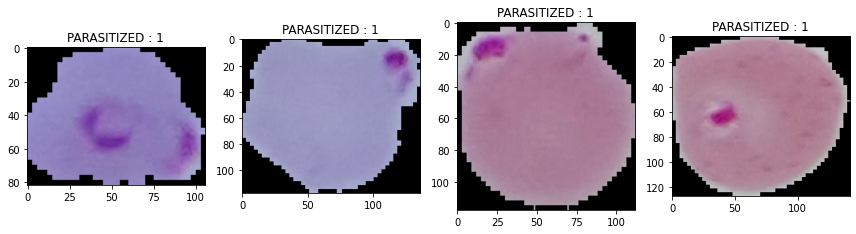

In [8]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/True_parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()


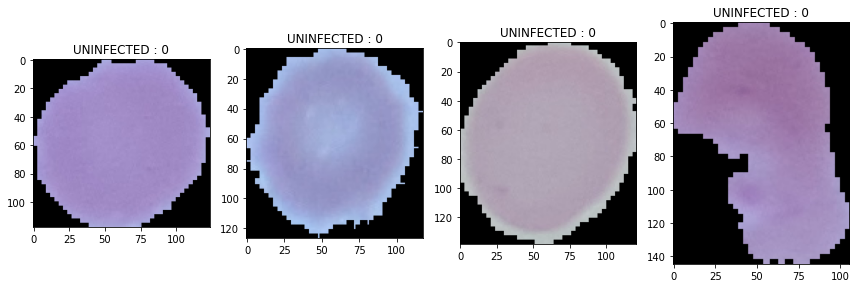

In [9]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/True_uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

It is noted that images are of different sizes.  These will need to be standardized into 64x64 size.  

In [10]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/True_parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (64, 64))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/True_uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (64, 64))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

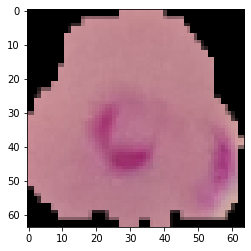

In [11]:
plt.imshow(data[0])
plt.show()

In [12]:
image_data = np.array(data)
labels = np.array(labels)

In [13]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [15]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [16]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (20928, 64, 64, 3)
SHAPE OF TESTING IMAGE DATA : (5233, 64, 64, 3)
SHAPE OF TRAINING LABELS : (20928, 2)
SHAPE OF TESTING LABELS : (5233, 2)


Getting the counts for uninfected and parasatized RBC's in the Training data.

In [17]:
df_train_labels=pd.DataFrame(data=y_train, index=None, columns=None) 
print(df_train_labels)

         0    1
0      0.0  1.0
1      0.0  1.0
2      0.0  1.0
3      0.0  1.0
4      1.0  0.0
...    ...  ...
20923  0.0  1.0
20924  1.0  0.0
20925  1.0  0.0
20926  0.0  1.0
20927  0.0  1.0

[20928 rows x 2 columns]


In [18]:
df_train_labels.value_counts()

0    1  
1.0  0.0    10471
0.0  1.0    10457
dtype: int64

In [19]:
df_test_labels=pd.DataFrame(data=y_test, index=None, columns=None) 
print(df_test_labels)

        0    1
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     0.0  1.0
4     1.0  0.0
...   ...  ...
5228  0.0  1.0
5229  0.0  1.0
5230  1.0  0.0
5231  1.0  0.0
5232  0.0  1.0

[5233 rows x 2 columns]


In [20]:
df_test_labels.value_counts()

0    1  
0.0  1.0    2675
1.0  0.0    2558
dtype: int64

**Converting one hot encoded y_label data to a single vector of target labels**

In [44]:
#creating new dataframes to convert one hot encoded data into a single vector for y_test and y_train labels
df_train_labels['New']=df_train_labels.values.argmax(1)+0
df_test_labels

,0,1,New
0,1.0,0.0,0
1,1.0,0.0,0
2,1.0,0.0,0
3,0.0,1.0,1
4,1.0,0.0,0
...,...,...,...
5228,0.0,1.0,1
5229,0.0,1.0,1
5230,1.0,0.0,0
5231,1.0,0.0,0


In [45]:
single_y_train= df_train_labels['New']
single_y_train

0        1
1        1
2        1
3        1
4        0
        ..
20923    1
20924    0
20925    0
20926    1
20927    1
Name: New, Length: 20928, dtype: int64

In [46]:
df_test_labels['New']=df_test_labels.values.argmax(1)+0
df_test_labels

,0,1,New
0,1.0,0.0,0
1,1.0,0.0,0
2,1.0,0.0,0
3,0.0,1.0,1
4,1.0,0.0,0
...,...,...,...
5228,0.0,1.0,1
5229,0.0,1.0,1
5230,1.0,0.0,0
5231,1.0,0.0,0


In [47]:
single_y_test= df_test_labels['New']
single_y_test

0       0
1       0
2       0
3       1
4       0
       ..
5228    1
5229    1
5230    0
5231    0
5232    1
Name: New, Length: 5233, dtype: int64

Getting the counts for uninfected and parasaitized RBC's in the Test data.

**Visualizing the balance between uninfected and parasitized RBCs in the data sets.**

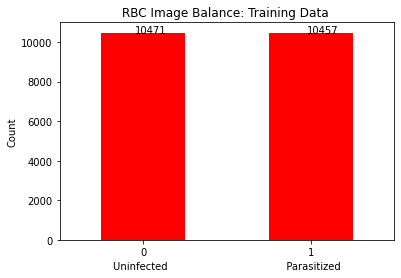

In [51]:
# bar plot to get the count unifected and parasitized RBC images in Training data

single_y_train.value_counts().plot(kind='bar', rot = 0, color='red')
plt.text(x = -0.05, y = single_y_train.value_counts()[1]+1, s = single_y_train.value_counts()[0])
plt.text(x = 0.98, y = single_y_train.value_counts()[0]+2, s = single_y_train.value_counts()[1])
plt.title('RBC Image Balance: Training Data ')
plt.xlabel('Uninfected                                      Parasitized')
plt.ylabel('Count')
plt.show()

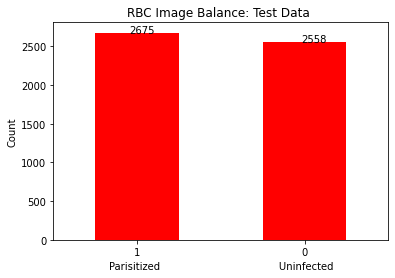

In [57]:
# bar plot to get the count unifected and parasitized RBC images in Test data

single_y_test.value_counts().plot(kind='bar', rot = 0, color='red')
plt.text(x = -0.05, y = single_y_test.value_counts()[1]+0, s = single_y_test.value_counts()[1])
plt.text(x = 0.98, y = single_y_test.value_counts()[0]+1, s = single_y_test.value_counts()[0])
plt.title('RBC Image Balance: Test Data ')
plt.xlabel('Parisitized                                      Uninfected')
plt.ylabel('Count')
plt.show()

**Observations:**

* Although the data are not 100% perfectly balanced, the same train/test split as utilized in Fuhad et. al, 2020 was utilized.  
* There were slightly more uninfected data in the training data from the corrected data.
* There are slightly more parasitized images than uninfected in the test set.  

**Check the minimum and maximum range of pixel values for train and test images**

In [27]:
# finding the maximum and minimum size of all images and pixel values for the training images

maxsize = []
minsize = []
maxpixel = []
minpixel = []
for image in x_train:
  maxsize.append(format(image.size))  
  minsize.append(format(image.size)) 
  maxpixel.append(format(image.max()))
  minpixel.append(format(image.min()))
print ("Max image size of all images: ", max(maxsize))
print ("Min image size of all images: ", min(minsize))  
print ("Max pixel size of all images: ", max(maxpixel))  
print ("Min pixel size of all images: ", min(minpixel))

Max image size of all images:  12288
Min image size of all images:  12288
Max pixel size of all images:  1.0
Min pixel size of all images:  0.0


In [28]:
# finding the maximum and minimum size of all images and pixel values for the test images

maxsize = []
minsize = []
maxpixel = []
minpixel = []
for image in x_test:
  maxsize.append(format(image.size))  
  minsize.append(format(image.size)) 
  maxpixel.append(format(image.max()))
  minpixel.append(format(image.min()))
print ("Max image size of all images: ", max(maxsize))
print ("Min image size of all images: ", min(minsize))  
print ("Max pixel size of all images: ", max(maxpixel))  
print ("Min pixel size of all images: ", min(minpixel))

Max image size of all images:  12288
Min image size of all images:  12288
Max pixel size of all images:  0.9980935454368591
Min pixel size of all images:  0.0


**Observations and insights:**
* Using the above methods in the corrected malaria dataset, the pixel sizes have all been normalized.  
* The image sizes are all standardized in both training and test data sets.

**Visualizing the normalized images from the training data**

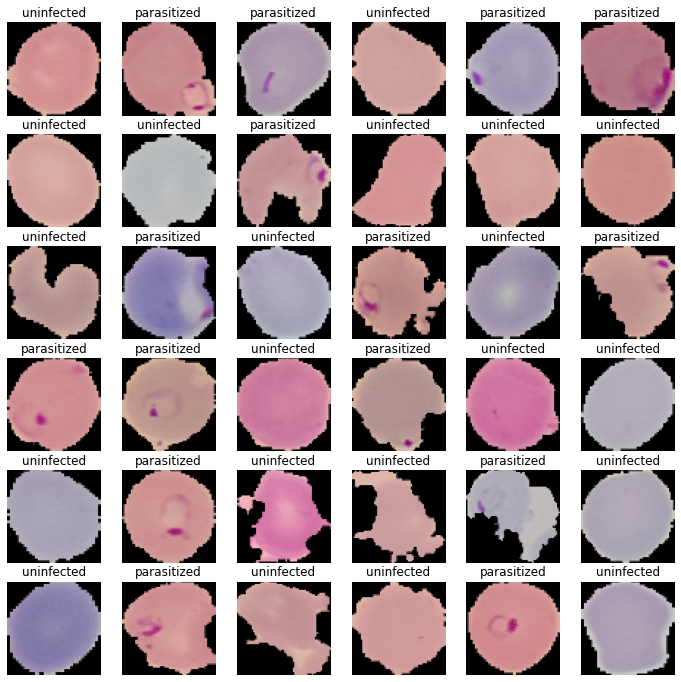

In [29]:
#Visualization of unifected and parasitized RBC images
np.random.seed(10)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, x_train.shape[0], 1))
    if single_y_train[index] == 1.0: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(x_train[index])
    plt.axis('off')

###**Plotting the mean images for Parasitized and Uninfected**

In [30]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

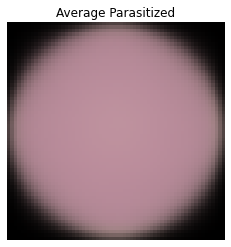

In [31]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(x_train, single_y_train):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

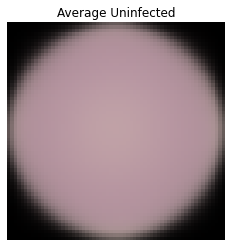

In [32]:
# Similarly write the code to find the mean image of uninfected
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
uninfected_data=[]                                # Create a list to store the uninfected data
for img, label in zip(x_train, single_y_train):
        if label==0:
             uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


**Observations:**

* The mean parasitized image looks much like the mean uninfected RBC.  
* The only discernable difference is a sligtly darker cytosol, likely due to the presence of Plasmodium and varrying locations within the cytosol of the RBC.  This likely then results in a mean image that is only a slight shade darker than the average uninfected.  
* I am unsure of the utility or legitimace in using a "mean image" technique on a cellular image such as this. 

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [33]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(x_train[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


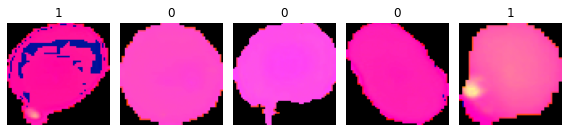

In [34]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(8,8))
for t,i in zip(range(5),viewimage):
  Title=single_y_train[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Converting the test data

In [35]:
# Similarly you can visualize for the images in the test data

gfx2=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(x_test[i],cv2.COLOR_BGR2HSV)
  gfx2.append(a)
gfx2=np.array(gfx2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


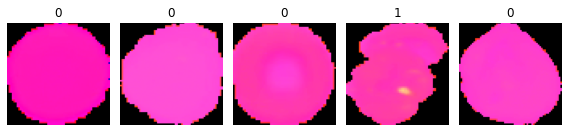

In [36]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(8,8))
for t,i in zip(range(5),viewimage):
  Title=single_y_test[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx2[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Observations:**

* Conversion of the images from RGB (Red, Green, Blue) to HSV (Hugh, Saturation, Value) results in a different image that one can still visually detect differences in the parasitized and unifected RBCs due to the presence of Plasmodium.  
* It appears that the Plasmodium detection may be enhanced, thus may serve as a means to allow for more robust method for differentiating parasitized and uninfected RBCs.
* This is a form of enhancement for object detection.  

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [37]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(x_train[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

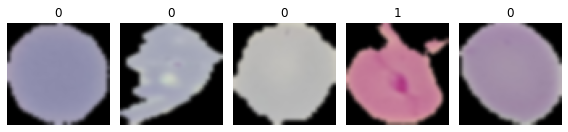

In [38]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(8,8))
for t,i in zip(range(5),viewimage):
  Title=single_y_train[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

In [39]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx2=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  c= cv2.GaussianBlur(x_test[i], (5, 5), 0)
  gbx2.append(c)
gbx2=np.array(gbx2)

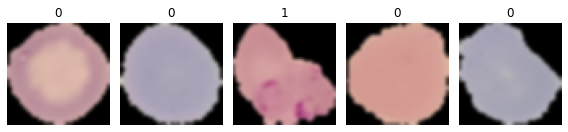

In [40]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(8,8))
for t,i in zip(range(5),viewimage):
  Title=single_y_test[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx2[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Observations and insights:**

* Gaussian Blurring is a method of data augmentation to provide the model a more robust sample of images and improve deep learning.  There are other methods of data augmentation that can also be utilized.

* According to Fuhad et. al 2020 several augmentation methods were utilized. 

* These are shown in Table 1 of the journal article.  These would be good methods of data augmentation to attempt.  

**Table 1
Augmentation table.** 
* Random Rotation
* 20 Degree
* Random Zoom	0.05
* Width Shift	(0.05, −0.05)
* Height Shift	(0.05, −0.05)
* Shear Intensity	0.05
* Horizontal Flip	True




# Augmentation of Images

In [41]:
# Install Augmentor
!pip install Augmentor

In [42]:
# Import Augmentor
import Augmentor

# Instantiate a Pipeline pointing to target input directory for Parasitized Images
p = Augmentor.Pipeline('/content/drive/MyDrive/Updated_Cell_Images/Augmentor')

# Perform horizontal flip
p.flip_left_right(probability=1)

# We then sample (1 image) from the pipeline
num_of_samples = 1
p.sample(num_of_samples)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/Updated_Cell_Images/Augmentor/output.

Processing <PIL.Image.Image image mode=RGB size=196x115 at 0x7F6F35584FD0>: 100%|██████████| 1/1 [00:00<00:00, 23.75 Samples/s]


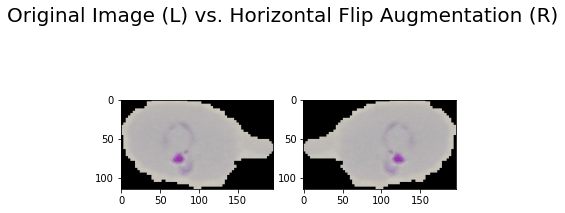

In [48]:
# Compare images
output_img_path = '/content/drive/MyDrive/Updated_Cell_Images/Augmentor/output/Augmentor_original_True_parasitized_original_C168P129ThinF_IMG_20151118_155802_cell_149.png_9f6e613f-aaef-464d-8792-e7ec1aa2f71a.png_bcbdb6d1-3e82-4a11-b5b0-2a37da2dec93.png'
transformed_img = Image.open(output_img_path, 'r')
original_img_path = '/content/drive/MyDrive/Updated_Cell_Images/Augmentor/True_parasitized_original_C168P129ThinF_IMG_20151118_155802_cell_149.png_9f6e613f-aaef-464d-8792-e7ec1aa2f71a.png'
original_img = Image.open(original_img_path, 'r')
fig, ax = plt.subplots(1,2)
fig.suptitle('Original Image (L) vs. Horizontal Flip Augmentation (R)', fontsize=20)
ax[0].imshow(original_img);
ax[1].imshow(transformed_img);

The above data augmentation library Augmentor shows a sample of how images can be horizontally flipped to augment the data set.

## **Proposed approach**

**Potential techniques:** <br>

* Different data augmentation techniques should be explored including random rotation, random zoom, wide shift, height shift, shear intensity, horizontal flip, gaussian blur and conversion to HSV.
* It is important that the images are standardized to size and pixel density.

**Overall solution design:** <br>

* The overall approach will include the following process:

1.   Use corrected Malaria Data Set
2.   Divide into appropriate Training and Test sets
3.   Ensure balanced data set
4.   Standardize image size and pixel density 
  *   Images may be standardized to 64x64; 32x32

5.   Create data augmentation piplines
  *   Model will be run with and without data augmentation

6.   Begin testing CNN model - use Fuhad et al., Diagnostics 10(5): 329, 2020 as a starting point (image below).

**Measures of success:** <br>

* It is important to note that since this is a medical diagnostic application using deep learning, that there should be very high and rigorous standards used as metrics of success.  The following benchmark goals are desired:

1.   98%-99% validation accuracy.
2.   0.10 or less validation loss
3.   98-99% F1 Score, Precision, Sensitivity and Specificity



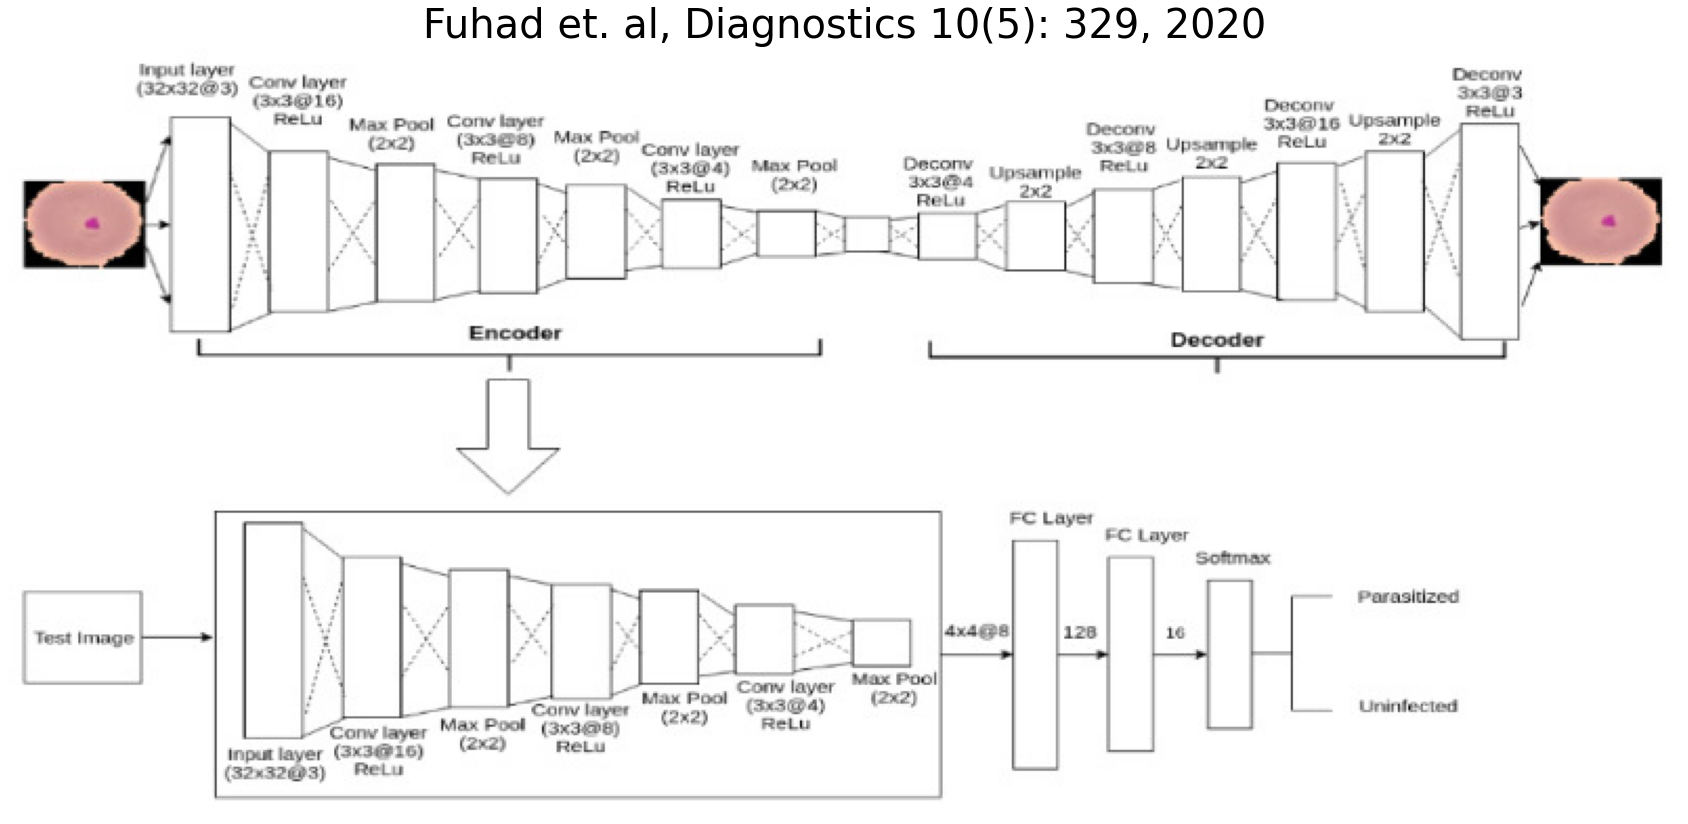

In [80]:
from PIL import Image

%matplotlib inline
Fuhad_img = Image.open('/content/drive/MyDrive/Updated_Cell_Images/Augmentor/diagnostics-10-00329-g003.jpeg', 'r')
plt.figure(figsize=(30,15))
Fuhad_img = np.array(Fuhad_img)
plt.title('Fuhad et. al, Diagnostics 10(5): 329, 2020', fontsize=40)
plt.axis('off')
plt.imshow(Fuhad_img);